In [5]:
import pandas as pd
import numpy as np

In [6]:
dataset = pd.read_csv("Iris.csv")
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
dataset.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
dataset.drop(columns=["Id"], inplace=True)

In [9]:
dataset["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
dataset.isnull()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**DATA VISUALISATION**


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**CORRELATION MATRIX**

Text(0.5, 1.0, 'Correlation Matrix')

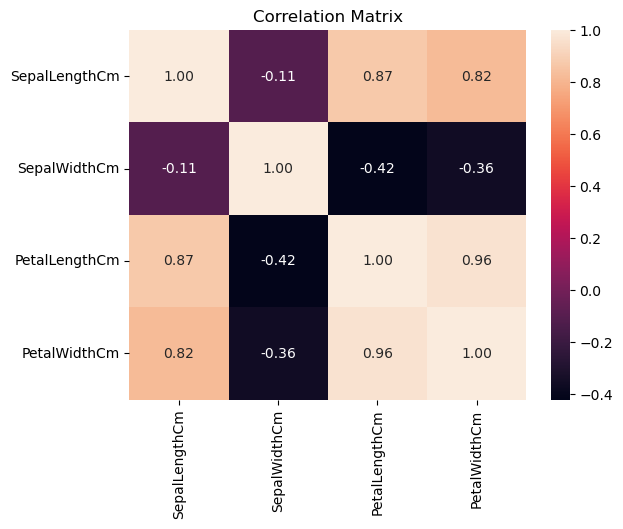

In [13]:
correlation_matrix = dataset.corr(numeric_only = True)
ax = sns.heatmap(data = correlation_matrix, annot = True, fmt = ".2f")
ax.set_title("Correlation Matrix")

Text(0.5, 1.0, 'Sepal Length Distribution')

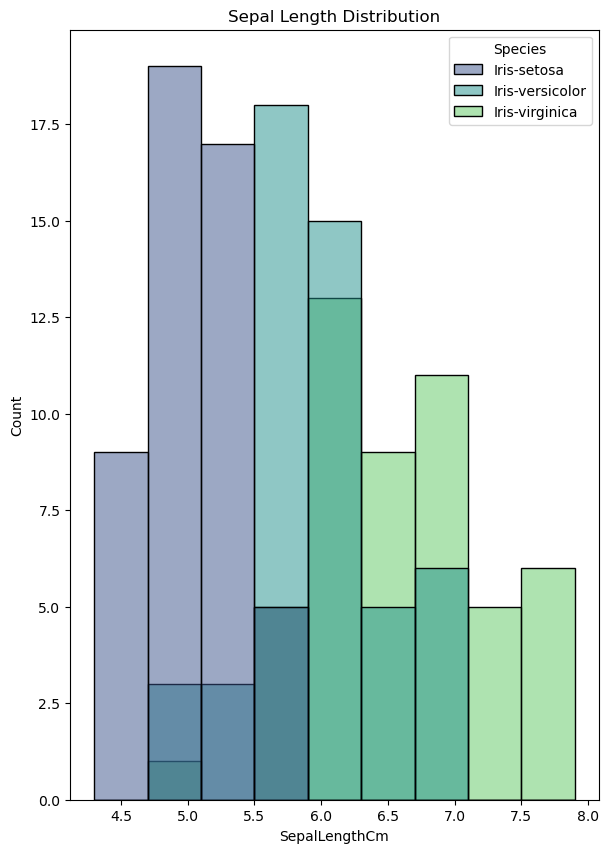

In [14]:
palette = "viridis"

plt.figure(figsize=(15, 10))

# Histograms for sepal length, sepal width, petal length, and petal width
plt.subplot(1, 2, 1)
sns.histplot(data=dataset, x="SepalLengthCm", hue="Species", palette=palette)
plt.title("Sepal Length Distribution")

Text(0.5, 1.0, 'Sepal Width Distribution')

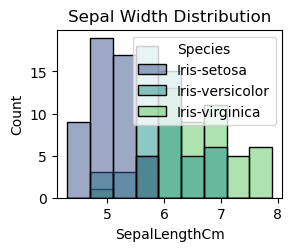

In [15]:

plt.subplot(2, 2, 2)
sns.histplot(data=dataset, x="SepalLengthCm", hue="Species", palette=palette)
plt.title("Sepal Width Distribution")

Text(0.5, 1.0, 'Petal Length Distribution')

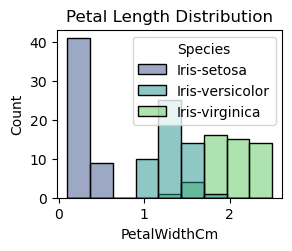

In [16]:

plt.subplot(2, 2, 3)
sns.histplot(data=dataset, x="PetalWidthCm", hue="Species", palette=palette)
plt.title("Petal Length Distribution")

Text(0.5, 1.0, 'Petal Width Distribution')

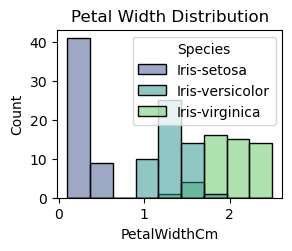

In [17]:
plt.subplot(2, 2, 4)
sns.histplot(data=dataset, x="PetalWidthCm", hue="Species", palette=palette)
plt.title("Petal Width Distribution")

**BOXPLOTS**

Text(0.5, 1.0, 'Sepal Length (cm) related to Species')

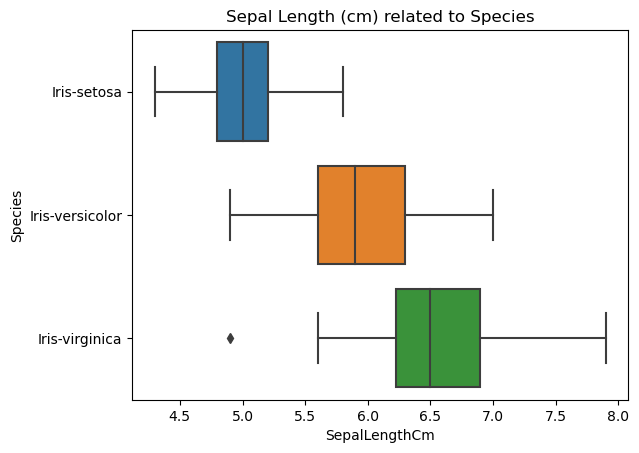

In [18]:
ax = sns.boxplot(
    data = dataset,
    x = dataset["SepalLengthCm"],
    y = dataset["Species"]
)
ax.set_title("Sepal Length (cm) related to Species")

In [19]:
dataset.query("Species == 'Iris-virginica' and SepalLengthCm < 5")

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
106,4.9,2.5,4.5,1.7,Iris-virginica


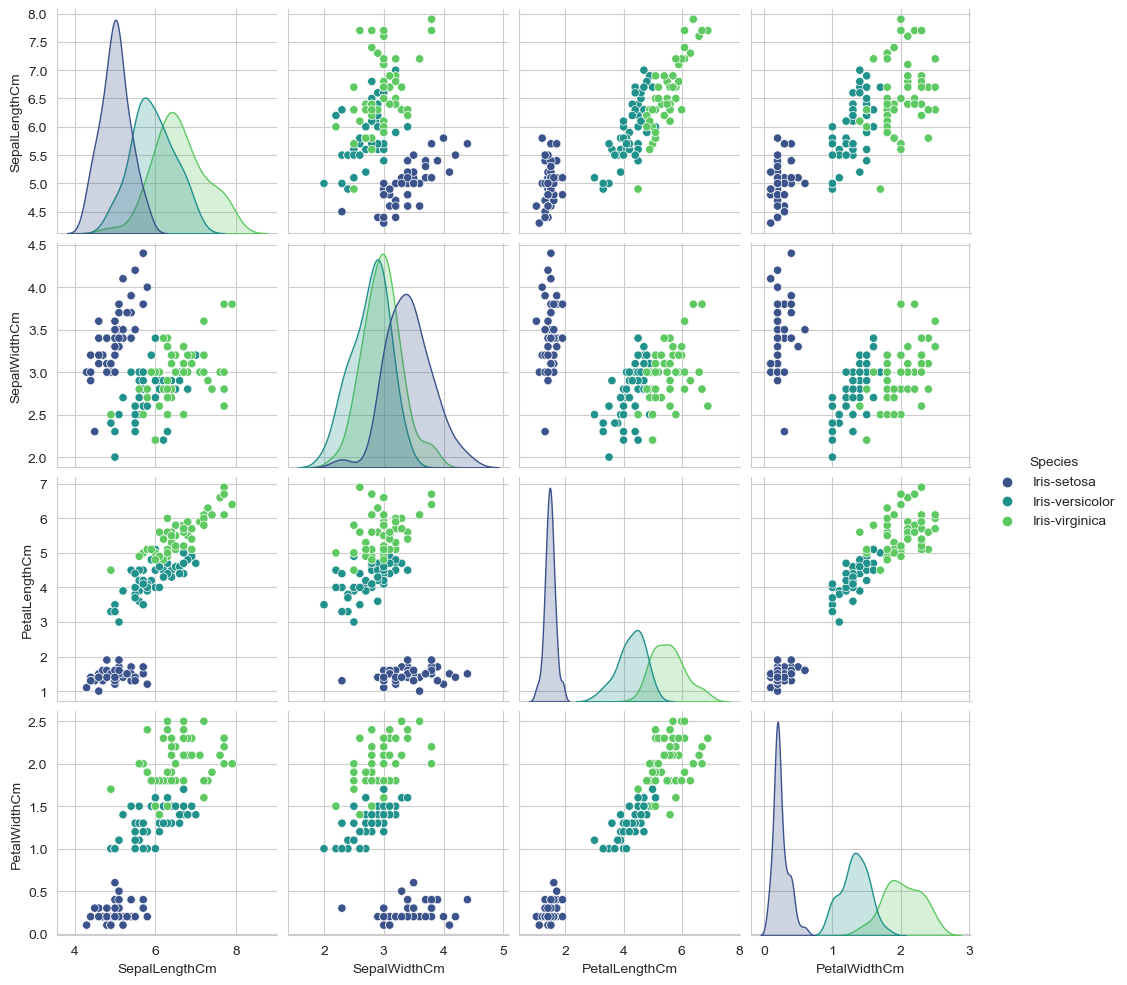

In [20]:
sns.set_style('whitegrid')
sns.pairplot(dataset, hue='Species', palette=palette)
plt.show()

**Removing outliers**

In [21]:
outliers = [106, 117, 119, 131]
dataset_treated = dataset.drop(outliers)
dataset_treated.shape

(146, 5)

Text(0.5, 1.0, 'Sepal Length (cm) related to Species')

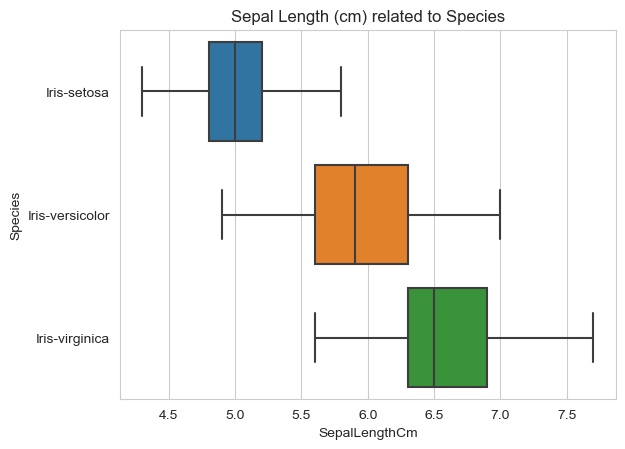

In [22]:
ax = sns.boxplot(
    data = dataset_treated,
    x = dataset_treated["SepalLengthCm"],
    y = dataset_treated["Species"]
)
ax.set_title("Sepal Length (cm) related to Species")

Text(0.5, 1.0, 'Sepal Width (cm) related to Species')

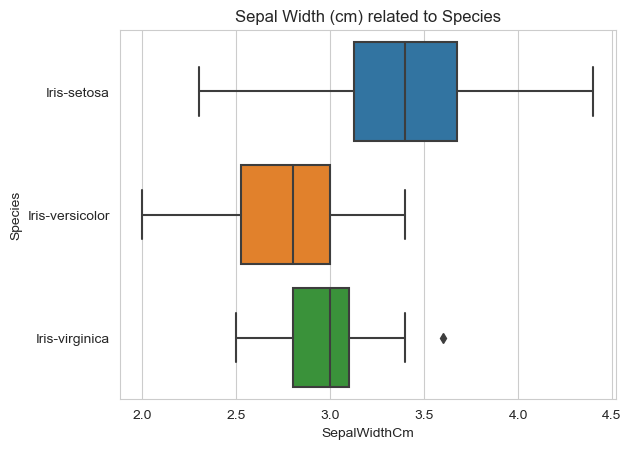

In [23]:
ax = sns.boxplot(
    data = dataset_treated,
    x = dataset_treated["SepalWidthCm"],
    y = dataset_treated["Species"]
)
ax.set_title("Sepal Width (cm) related to Species")

In [24]:
X = dataset_treated[["SepalLengthCm", "SepalWidthCm"]]
X.shape

(146, 2)

In [25]:
y = dataset_treated["Species"]
y.shape

(146,)

**SUPERVISED LEARNING**

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, cross_validate

In [27]:
from scipy.stats import randint
import warnings

warnings.filterwarnings('ignore')

SEED = 42
np.random.seed(SEED)

cross_validator = StratifiedKFold(n_splits = 5, shuffle = True)

params_space = {
    "max_depth": randint(1,33),
    "min_samples_split": randint(1,151),
    "min_samples_leaf": randint(1,151),
    "criterion": ["gini", "entropy"]
}

search = RandomizedSearchCV(
    DecisionTreeClassifier(),
    params_space,
    n_iter = 5000,
    cv = cross_validator
)

search.fit(X, y)
search_result = pd.DataFrame(search.cv_results_)
search_result.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003145,0.006291,0.003122,0.006244,gini,20,93,15,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.333333,0.344828,0.344828,0.344828,0.344828,0.342529,0.004598,1540
1,0.000000,0.000000,0.000000,0.000000,gini,8,21,103,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.666667,0.586207,0.620690,0.586207,0.655172,0.622989,0.033629,975
2,0.001219,0.002439,0.000000,0.000000,entropy,19,75,88,"{'criterion': 'entropy', 'max_depth': 19, 'min...",0.333333,0.344828,0.344828,0.344828,0.344828,0.342529,0.004598,1540
3,0.002018,0.004036,0.000000,0.000000,gini,4,104,131,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.333333,0.344828,0.344828,0.344828,0.344828,0.342529,0.004598,1540
4,0.000000,0.000000,0.003142,0.006285,entropy,21,2,88,"{'criterion': 'entropy', 'max_depth': 21, 'min...",0.666667,0.586207,0.620690,0.586207,0.655172,0.622989,0.033629,975


In [28]:
search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=3,
                       min_samples_split=43)

In [29]:
SEED = 42
np.random.seed(SEED)

best_model = search.best_estimator_
results = cross_validate(best_model, X, y, cv = cross_validator)
mean = results["test_score"].mean() * 100
std = results["test_score"].std() * 100
print("Best model accuracy range: [%.2f, %.2f]" % (mean - 2 * std, mean + 2 * std))

Best model accuracy range: [61.98, 90.16]


**Unsupervised learning**


**Normalizing data**

In [30]:
from sklearn.preprocessing import Normalizer

X_normalized = Normalizer().fit_transform(X.values)

**Extracting Clusters**

In [31]:
from sklearn.cluster import KMeans

SEED = 42
np.random.seed(SEED)

kmeans = KMeans(n_clusters = 3, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(X_normalized)

In [32]:
from sklearn import metrics

labels = kmeans.labels_
silhouette = metrics.silhouette_score(X_normalized, labels, metric="euclidean")
print("Silhouette Score: {:.4f}".format(silhouette))

Silhouette Score: 0.5678


In [33]:
dbs = metrics.davies_bouldin_score(X_normalized, labels)
print("Davies-Bouldin Score: {:.4f}".format(dbs))

Davies-Bouldin Score: 0.5669


**Testing number of clusters**

In [34]:
def clustering(n_clusters, data):
    SEED = 42
    np.random.seed(SEED)

    kmeans = KMeans(n_clusters = n_clusters, n_init=10, max_iter=300)
    kmeans.fit(data)
    
    labels = kmeans.labels_
    silhouette = metrics.silhouette_score(data, labels, metric="euclidean")
    dbs = metrics.davies_bouldin_score(data, labels)
    calinski = metrics.calinski_harabasz_score(data, labels)
    return n_clusters, silhouette, dbs, calinski

In [35]:
clusters_metrics = []
for i in range(2,30):
    cluster_metrics = clustering(i, X_normalized)
    clusters_metrics.append(cluster_metrics)
columns = ["n_clusters", "silhouette", "davies_bouldin", "calinski_harabasz"]
clusters_metrics_df = pd.DataFrame(data=clusters_metrics, columns=columns)
clusters_metrics_df.head(5)

,n_clusters,silhouette,davies_bouldin,calinski_harabasz
0,2,0.742952,0.326500,700.627307
1,3,0.567814,0.566881,679.058356
2,4,0.640776,0.442897,719.955308
3,5,0.582769,0.538244,992.872889
4,6,0.599023,0.477775,1067.919465


In [36]:
clusters_metrics_df.sort_values("silhouette", ascending = False).head(5)

,n_clusters,silhouette,davies_bouldin,calinski_harabasz
0,2,0.742952,0.326500,700.627307
27,29,0.640883,0.382400,6166.065376
2,4,0.640776,0.442897,719.955308
26,28,0.635149,0.383634,5763.200712
25,27,0.633981,0.379156,5139.761765


Text(0.5, 1.0, 'Silhouette score related to Number of Clusters')

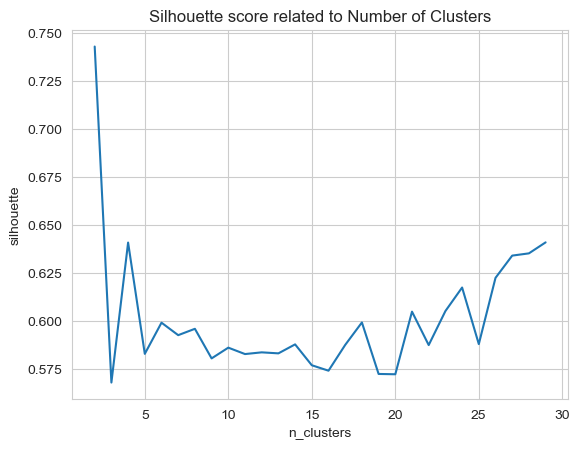

In [37]:
ax = sns.lineplot(data=clusters_metrics_df, x="n_clusters", y="silhouette")
ax.set_title("Silhouette score related to Number of Clusters")

In [38]:
clusters_metrics_df.sort_values("davies_bouldin", ascending = True).head(10)

,n_clusters,silhouette,davies_bouldin,calinski_harabasz
0,2,0.742952,0.326500,700.627307
25,27,0.633981,0.379156,5139.761765
27,29,0.640883,0.382400,6166.065376
26,28,0.635149,0.383634,5763.200712
24,26,0.622382,0.392394,4778.370188
22,24,0.617347,0.403541,4264.682538
23,25,0.587853,0.406550,4565.516067
19,21,0.604770,0.410088,3797.634637
16,18,0.599137,0.411661,2827.855121
21,23,0.605072,0.428917,4123.992359


Text(0.5, 1.0, 'Davis-Bouldin score related to Number of Clusters')

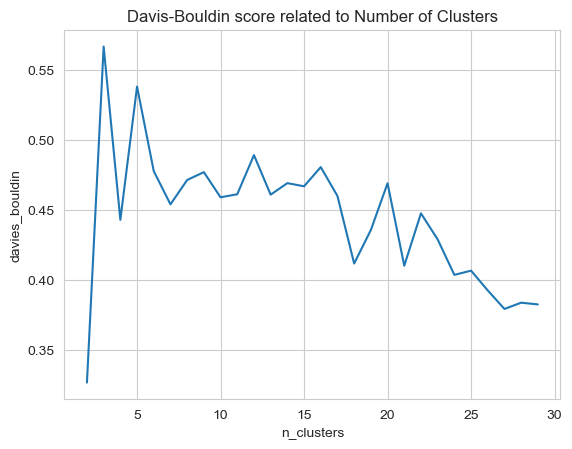

In [39]:
ax = sns.lineplot(data=clusters_metrics_df, x="n_clusters", y="davies_bouldin")
ax.set_title("Davis-Bouldin score related to Number of Clusters")

In [40]:
clusters_metrics_df.sort_values("calinski_harabasz", ascending = False).head(10)

,n_clusters,silhouette,davies_bouldin,calinski_harabasz
27,29,0.640883,0.382400,6166.065376
26,28,0.635149,0.383634,5763.200712
25,27,0.633981,0.379156,5139.761765
24,26,0.622382,0.392394,4778.370188
23,25,0.587853,0.406550,4565.516067
22,24,0.617347,0.403541,4264.682538
21,23,0.605072,0.428917,4123.992359
20,22,0.587347,0.447550,3927.704241
19,21,0.604770,0.410088,3797.634637
18,20,0.572131,0.469058,3215.916762


Text(0.5, 1.0, 'Calinski-Harabasz score related to Number of Clusters')

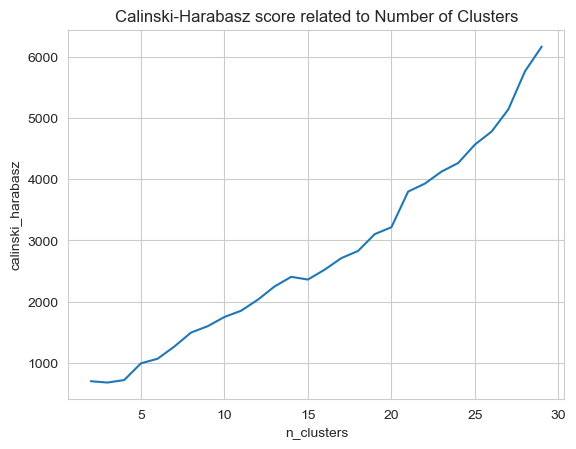

In [41]:
ax = sns.lineplot(data=clusters_metrics_df, x="n_clusters", y="calinski_harabasz")
ax.set_title("Calinski-Harabasz score related to Number of Clusters")

**CONCLUSION**

Text(0.5, 1.0, 'Sepal Length (cm) x Sepal Width (cm) related to Species')

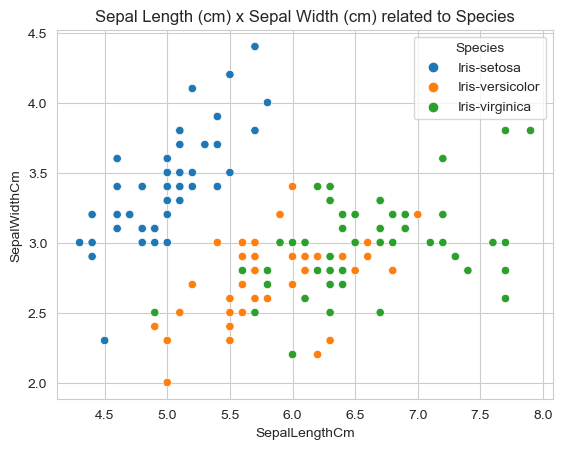

In [43]:
ax = sns.scatterplot(
    data=dataset, 
    x="SepalLengthCm", 
    y="SepalWidthCm",
    hue="Species"
)
ax.set_title("Sepal Length (cm) x Sepal Width (cm) related to Species")